In [9]:
import pandas as pd

# Load the dataset from GitHub
url = "https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv"
df = pd.read_csv(url)

# Display the first few rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
target_0_df = df[df['target'] == 0]

# Display the first few rows of this filtered data
print(target_0_df.head())

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
165   67    1   0       160   286    0        0      108      1      1.5   
166   67    1   0       120   229    0        0      129      1      2.6   
167   62    0   0       140   268    0        0      160      0      3.6   
168   63    1   0       130   254    0        0      147      0      1.4   
169   53    1   0       140   203    1        0      155      1      3.1   

     slope  ca  thal  target  
165      1   3     2       0  
166      1   2     3       0  
167      0   2     2       0  
168      1   1     3       0  
169      0   0     3       0  


In [11]:
# Check for missing values
missing_values = df.isnull().sum()

# Check data types of the columns
data_types = df.dtypes

# Display the results
print("Missing values:\n", missing_values)
print("\nData types:\n", data_types)

# Group by the data types and count the occurrences
data_type_counts = df.dtypes.value_counts()

# Display the result
print("Data type counts:\n", data_type_counts)


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
Data type counts:
 int64      13
float64     1
Name: count, dtype: int64


In [12]:
# Find columns with float64 data type
float_columns = df.select_dtypes(include=['float64']).columns

# Display the column names that are of type float64
print("Columns with float64 data type:", float_columns)


Columns with float64 data type: Index(['oldpeak'], dtype='object')


In [13]:
# Distribution of the target variable
target_counts = df['target'].value_counts()

# Display the counts
print("Target variable distribution:\n", target_counts)


Target variable distribution:
 target
1    165
0    138
Name: count, dtype: int64


In [14]:
# Statistical summary of numeric columns
summary_stats = df.describe()

# Display the summary
print("Statistical Summary:\n", summary_stats)


Statistical Summary:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std  

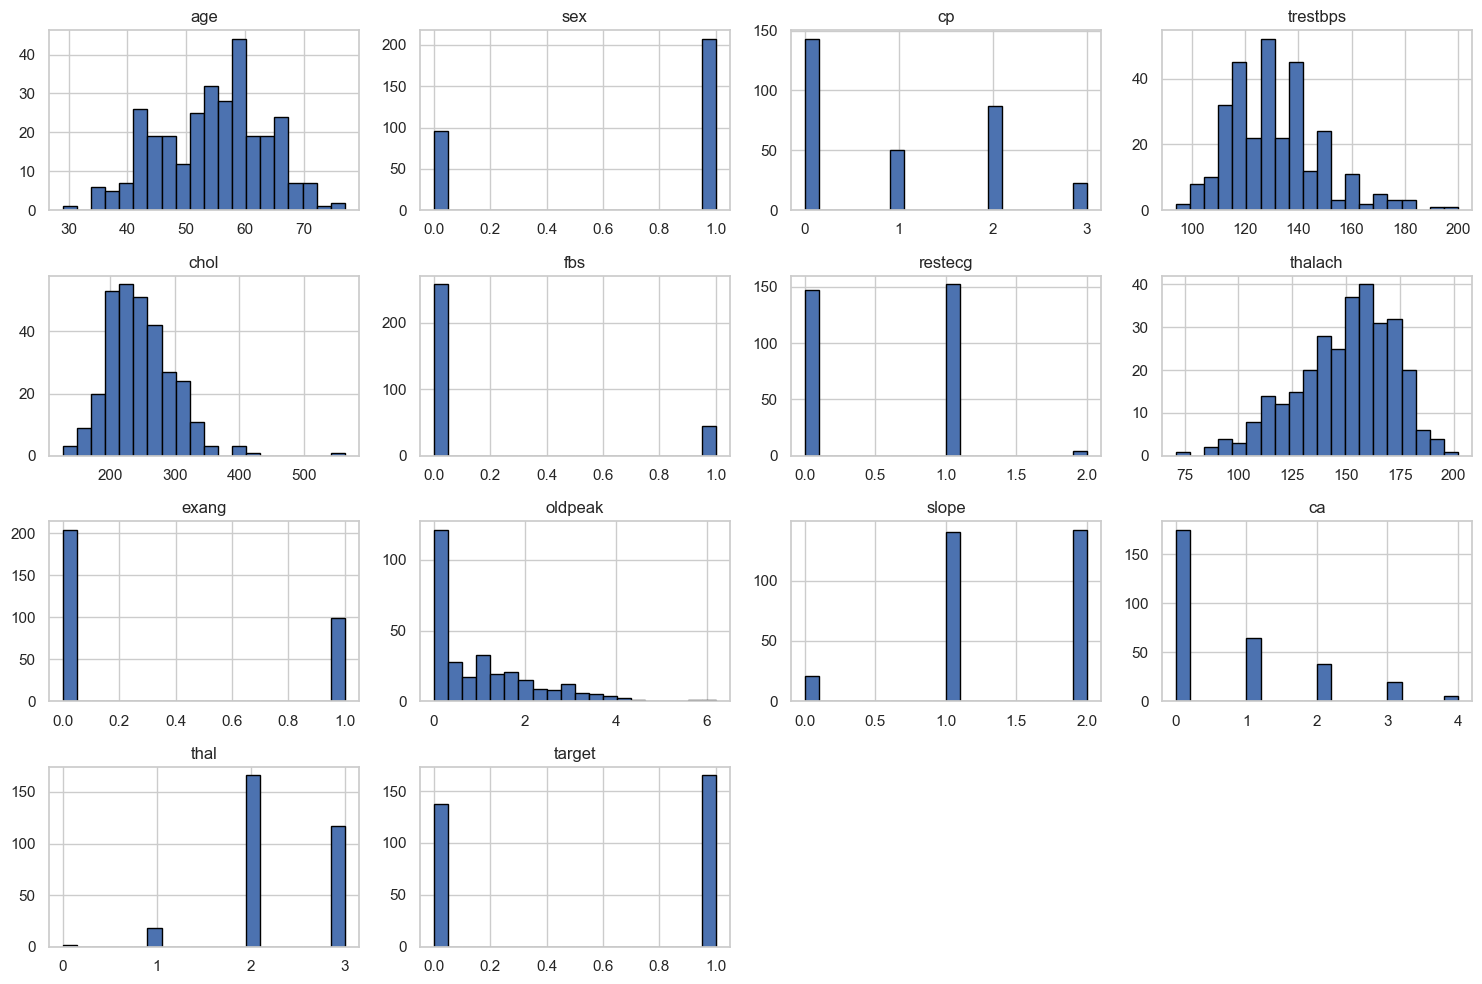

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# Plot histograms for numeric features
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.hist(bins=20, figsize=(15, 10), edgecolor='black')

# Show the plot
plt.tight_layout()
plt.show()


ValueError: num must be an integer with 1 <= num <= 12, not 13

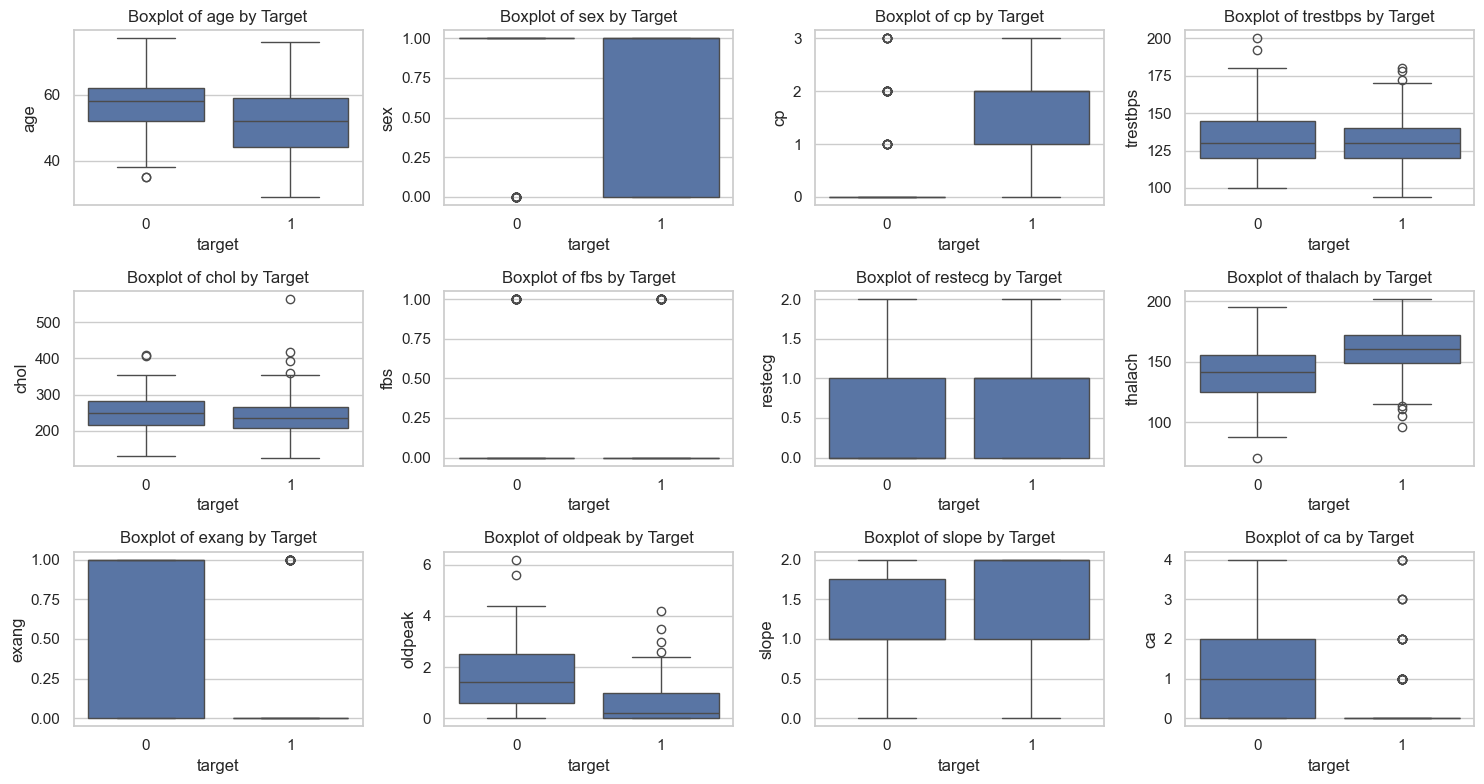

In [16]:
# Boxplot to compare numeric features between target = 0 and target = 1
plt.figure(figsize=(15, 8))

# List of numeric columns to plot
numeric_columns = df_numeric.columns

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # Adjust the subplot grid as necessary
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'Boxplot of {col} by Target')
    plt.tight_layout()

plt.show()


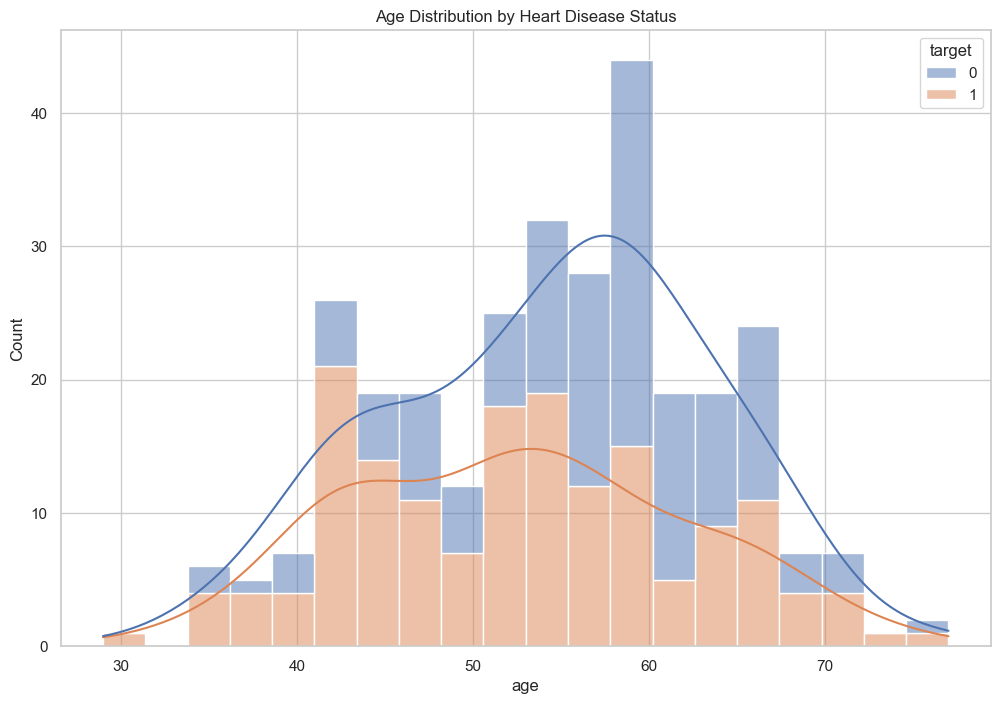

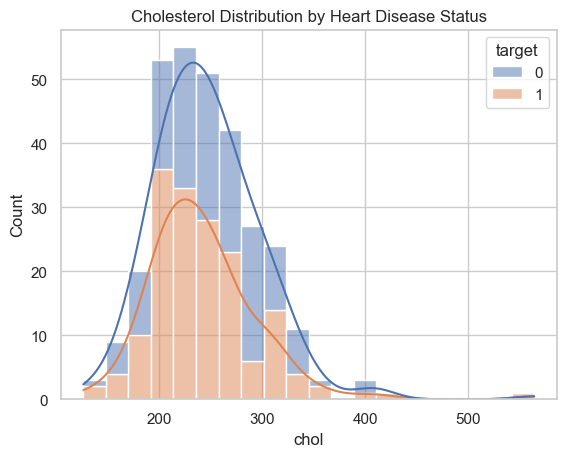

In [ ]:
# Plot comparisons between features and target (heart disease or not)
plt.figure(figsize=(12, 8))

# Plot age distribution by target
sns.histplot(df, x='age', hue='target', multiple='stack', bins=20, kde=True)
plt.title('Age Distribution by Heart Disease Status')
plt.show()

# Plot cholesterol levels distribution by target
sns.histplot(df, x='chol', hue='target', multiple='stack', bins=20, kde=True)
plt.title('Cholesterol Distribution by Heart Disease Status')
plt.show()


In [ ]:
# Calculate the IQR for numeric columns
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the dataset
outliers = ((df_numeric < lower_bound) | (df_numeric > upper_bound))

# Count the number of outliers for each feature
outlier_counts = outliers.sum()

# Display the result
print("Outlier counts for each feature:\n", outlier_counts)


Outlier counts for each feature:
 age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          25
thal         2
target       0
dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Features and target
X = df.drop("target", axis=1)
y = df["target"]

# 2. Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 4. Predict on test set
y_pred = rf.predict(X_test)

# 5. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8360655737704918

Confusion Matrix:
 [[24  5]
 [ 5 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [19]:
# Get feature importance from the trained Random Forest model
importances = rf.feature_importances_

# Create a pandas DataFrame to visualize the importance
features = df.drop(columns=["target"]).columns  # Exclude the target column
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Display the most important features
print(importance_df)


     Feature  Importance
9    oldpeak    0.128485
7    thalach    0.119725
11        ca    0.115533
2         cp    0.103792
12      thal    0.093300
0        age    0.092811
3   trestbps    0.077537
8      exang    0.075809
4       chol    0.074812
10     slope    0.051058
1        sex    0.035658
6    restecg    0.019782
5        fbs    0.011698


In [20]:
# Step 1: Drop less important features from the data
X_reduced = X_train.drop(columns=["restecg", "fbs", "sex", "slope"])

# Step 2: Train Random Forest model with reduced features
rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(X_reduced, y_train)

# Step 3: Predict on the test set with the reduced model
X_test_reduced = X_test.drop(columns=["restecg", "fbs", "sex", "slope"])
y_pred_reduced = rf_model_reduced.predict(X_test_reduced)

# Step 4: Evaluate the performance of the reduced model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"Accuracy (Reduced Model): {accuracy_reduced}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_reduced))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_reduced))


Accuracy (Reduced Model): 0.8524590163934426

Confusion Matrix:
[[24  5]
 [ 4 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Features and target (use reduced feature set if you want)
X = df[["oldpeak", "thalach", "ca", "cp", "thal", "age", "trestbps", "exang", "chol"]]  # or df.drop(columns=["target"]) for all features
y = df["target"]

# Create the model
rf = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

# Display the results
print("Cross-validation scores:", scores)
print("Average accuracy:", np.mean(scores))


Cross-validation scores: [0.80327869 0.8852459  0.78688525 0.76666667 0.73333333]
Average accuracy: 0.7950819672131147


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest
rf = RandomForestClassifier(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.8381967213114754


In [23]:
# Train the best model on the training set
best_rf = RandomForestClassifier(
    max_depth=3,
    min_samples_split=2,
    n_estimators=50,
    random_state=42
)

best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8852459016393442

Confusion Matrix:
 [[25  4]
 [ 3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [28]:
# Assuming you've already split your data into training and testing sets and trained the model

# Fit the model if it's not fitted yet
rf.fit(X_train, y_train)  # Train on the original training data



# Create new samples (patient data)
new_samples = pd.DataFrame({
    'age': [30, 60],
    'sex': [0, 0],
    'cp': [1, 3],
    'trestbps': [130, 140],
    'chol': [250, 270],
    'fbs': [0, 0],
    'restecg': [1, 0],
    'thalach': [160, 150],
    'exang': [0, 1],
    'oldpeak': [1.2, 1.8],
    'slope': [1, 2],
    'ca': [0, 2],
    'thal': [2, 3]
})

# Use the trained model to predict the target for the new samples
predictions = rf.predict(new_samples)

# Display the predictions (0 = no disease, 1 = disease)
print("Predictions:", predictions)


Predictions: [1 0]


In [29]:
# Let's modify the values of the important features and make predictions again
new_samples_modified = pd.DataFrame({
    'age': [30, 60],
    'sex': [0, 0],
    'cp': [1, 3],
    'trestbps': [130, 140],
    'chol': [250, 270],
    'fbs': [0, 0],
    'restecg': [1, 0],
    'thalach': [160, 140],  # Decrease heart rate (thalach)
    'exang': [0, 1],
    'oldpeak': [1.2, 2.5],  # Increase oldpeak (more severe)
    'slope': [1, 2],
    'ca': [0, 3],  # Increase number of major vessels
    'thal': [2, 3]
})

# Predictions with modified values
predictions_modified = rf.predict(new_samples_modified)

# Display the predictions (0 = no disease, 1 = disease)
print("Modified Predictions:", predictions_modified)


Modified Predictions: [1 0]
